# Introduction

In this lab, we will compare the performance of two regression models, HuberRegressor and Ridge, on a dataset with strong outliers. We will generate a toy dataset, add strong outliers to it, and then fit both models to the dataset. We will visualize the results and compare the performance of the models.

# Import Required Libraries

We will start by importing the required libraries, including numpy and matplotlib for data manipulation and visualization, and HuberRegressor and Ridge from scikit-learn for regression modeling.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

# Generate Toy Data

We will now generate a toy dataset using make_regression function from scikit-learn. We will generate a dataset with 20 samples, one feature, and a random seed of 0. We will also add some noise to the dataset.

In [2]:
rng = np.random.RandomState(0)
X, y = make_regression(
    n_samples=20, n_features=1, random_state=0, noise=4.0, bias=100.0
)

# Add Strong Outliers to the Dataset

We will add four strong outliers to the dataset. We will generate random values for these outliers using the normal distribution. We will then add these outliers to the dataset.

In [3]:
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.0
X_outliers[2:, :] += X.min() - X.mean() / 4.0
y_outliers[:2] += y.min() - y.mean() / 4.0
y_outliers[2:] += y.max() + y.mean() / 4.0
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))

# Visualize the Dataset

We will now visualize the dataset using matplotlib. We will plot the values of X against the values of y.

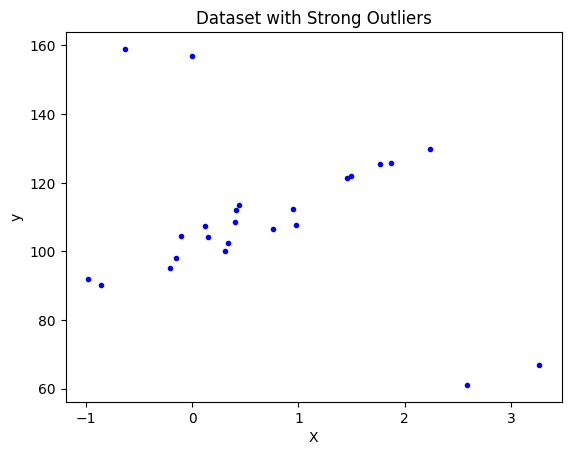

In [4]:
plt.plot(X, y, "b.")
plt.title("Dataset with Strong Outliers")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Fit the Huber Regressor

We will now fit the HuberRegressor to the dataset. We will fit the model over a range of epsilon values to show how the decision function approaches that of the Ridge regression as the value of epsilon increases.

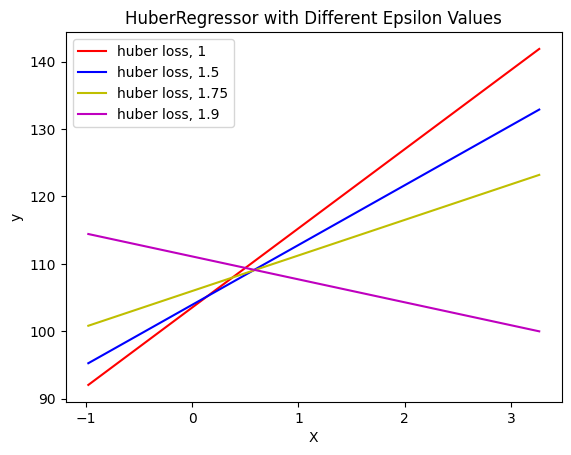

In [5]:
# Define the range of values for epsilon
epsilon_values = [1, 1.5, 1.75, 1.9]

# Define the x values for plotting
x = np.linspace(X.min(), X.max(), 7)

# Define the colors for plotting
colors = ["r-", "b-", "y-", "m-"]

# Fit the huber regressor over a series of epsilon values.
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(alpha=0.0, epsilon=epsilon)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)

# Add a legend to the plot
plt.legend(loc=0)

# Show the plot
plt.title("HuberRegressor with Different Epsilon Values")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Fit the Ridge Regressor

We will now fit the Ridge regressor to the dataset and compare its performance to that of the HuberRegressor.

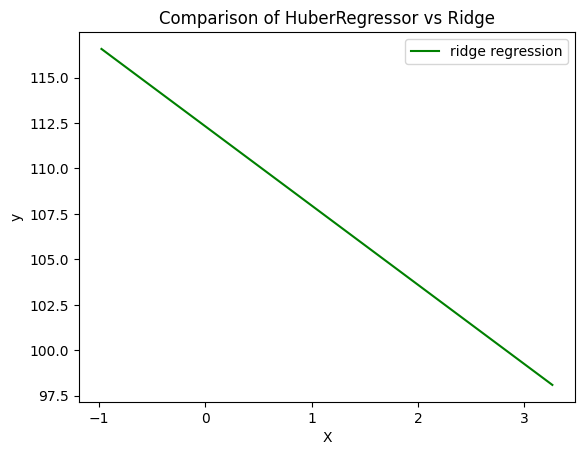

In [6]:
# Fit a ridge regressor to compare it to huber regressor.
ridge = Ridge(alpha=0.0, random_state=0)
ridge.fit(X, y)
coef_ridge = ridge.coef_
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, "g-", label="ridge regression")

# Add a legend to the plot
plt.legend(loc=0)

# Show the plot
plt.title("Comparison of HuberRegressor vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Summary

In this lab, we compared the performance of two regression models, HuberRegressor and Ridge, on a dataset with strong outliers. We generated a toy dataset, added strong outliers to it, and then fit both models to the dataset. We visualized the results and compared the performance of the models. We observed that the HuberRegressor was less influenced by the outliers than the Ridge regressor, and that as the value of epsilon increased, the decision function of the HuberRegressor approached that of the Ridge regressor.